In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

In [1]:
from google.colab import files
uploaded = files.upload()

Saving compresive_strength_concrete.csv to compresive_strength_concrete.csv


In [6]:
df=pd.read_csv(io.BytesIO(uploaded['compresive_strength_concrete.csv']))

In [7]:
df.shape

(1030, 9)

In [8]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [10]:
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [11]:
X_train = df.sample(frac = 0.7, random_state = 123)
X_test = df.drop(X_train.index)

In [12]:
X_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.33
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28,26.86
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28,36.80


In [13]:
# Assigning features and target variable
Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:-1]
Y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:,0:-1]

In [14]:
# Find Mean and Standard Deviation
X_mean = X_train.mean()
X_train -= X_mean
X_std = X_train.std()
X_train /= X_std
X_test -= X_mean
X_test /= X_std

In [15]:
Y_mean = Y_train.mean()
Y_train -= Y_mean
Y_std = Y_train.std()
Y_train /= Y_std
Y_test -= Y_mean
Y_test /= Y_std

In [16]:
X_train.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                float64
dtype: object

In [17]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [21]:
# Model selection
from tensorflow.keras import layers
from tensorflow.keras import models

In [22]:
model = models.Sequential()

In [23]:
model.add(layers.Dense(128,activation="relu",input_shape=(X_train.shape[1],)))

In [24]:
model.add(layers.Dense(64,activation="relu"))

In [25]:
model.add(layers.Dense(32,activation="relu"))

In [26]:
model.add(layers.Dense(1))

In [27]:
model.compile(optimizer="rmsprop",loss=["mse"],metrics=["mae"])

In [28]:
history = model.fit(X_train,Y_train,epochs=200,validation_split=0.3, batch_size = 16)

Epoch 1/200
32/32 [==============================] - 1s 9ms/step - loss: 0.7074 - mae: 0.6982 - val_loss: 0.4198 - val_mae: 0.5236
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3056 - mae: 0.4506 - val_loss: 0.3239 - val_mae: 0.4483
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.2391 - mae: 0.3904 - val_loss: 0.2944 - val_mae: 0.4228
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2016 - mae: 0.3493 - val_loss: 0.2702 - val_mae: 0.4042
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1452 - mae: 0.2953 - val_loss: 0.2684 - val_mae: 0.4057
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1594 - mae: 0.3098 - val_loss: 0.2437 - val_mae: 0.3812
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1199 - mae: 0.2702 - val_loss: 0.2540 - val_mae: 0.3856
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1264 - m

In [29]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [30]:
loss,mae=model.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1369 - mae: 0.2400


In [31]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

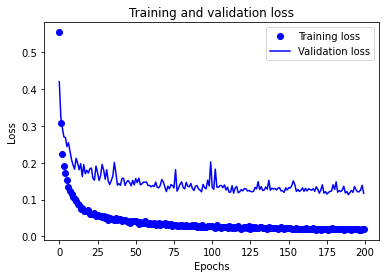

In [32]:
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(200)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

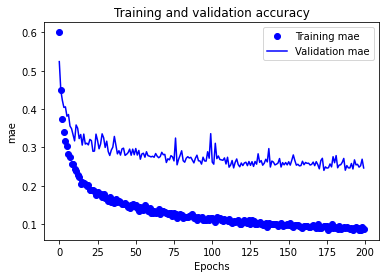

In [33]:
import matplotlib.pyplot as plt 
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [35]:
y_prediction = model.predict(X_test)

In [36]:
def denorm(x):
    return (x * Y_std) + Y_mean
    

In [37]:
y_prediction = denorm(y_prediction)

In [38]:
y_true = denorm(Y_test)

In [39]:
y_prediction = y_prediction.flatten()

In [40]:
y_prediction.shape

(309,)

In [41]:
y_true.shape

(309,)

(0.0, 100.0)

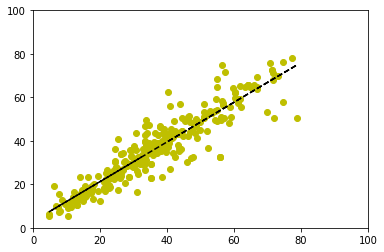

In [42]:
import numpy as np
import matplotlib.pyplot as plt
coef = np.polyfit(y_true,y_prediction,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(y_true,y_prediction, 'yo', y_true, poly1d_fn(y_true), '--k')
plt.xlim(0, 100)
plt.ylim(0, 100)